In [86]:
import sys
from pathlib import Path

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

print(f'date_str: {date_str}')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\setuptools\\_vendor', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src', 'c:\\Users\\ping\\Files_w

In [87]:
# date_str = '2025-04-11'

In [88]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [89]:
zscore_df = pd.read_parquet(f'..\data\{date_str}_zscore_df.parquet', engine='pyarrow')
cluster_stats_df = pd.read_parquet(f'..\data\{date_str}_cluster_stats_df.parquet', engine='pyarrow')
detailed_clusters_df = pd.read_parquet(f'..\data\{date_str}_detailed_clusters_df.parquet', engine='pyarrow')
df_data = pd.read_parquet(f'..\data\{date_str}_df_finviz_merged.parquet', engine='pyarrow')

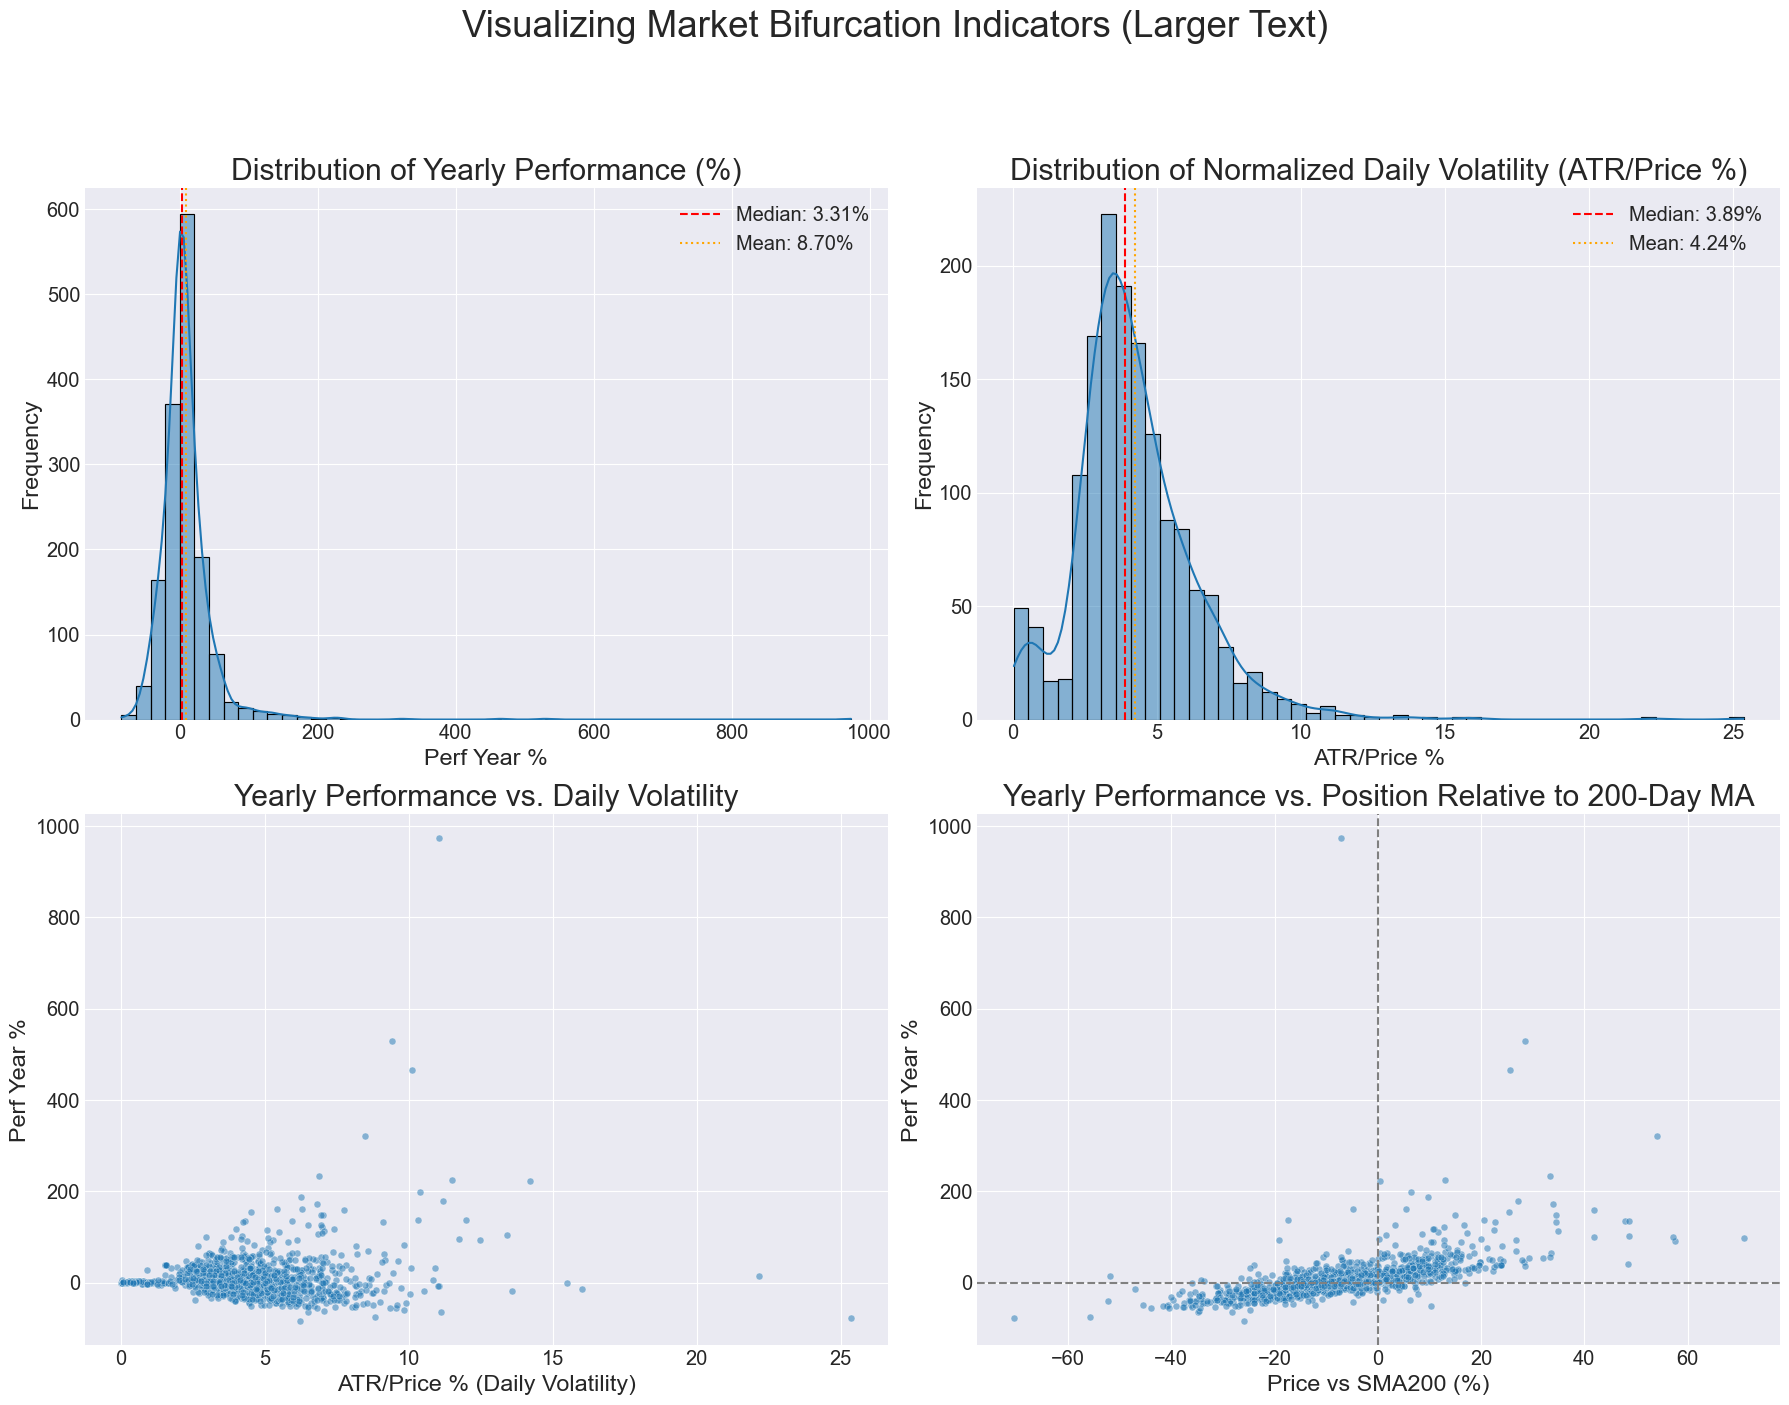

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

In [91]:
detailed_clusters_df

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Price,"MktCap AUM, M"
144,1,BOXX,0.7072,3031.9260,0.0002,111.7300,5710.0000
357,1,BITB,0.2917,8.3442,0.0350,45.9200,3160.0000
358,1,ARKB,0.2893,8.3204,0.0348,84.1600,3970.0000
354,1,IBIT,0.2943,8.2838,0.0355,48.0300,48070.0000
359,1,FBTC,0.2888,8.1704,0.0353,73.6800,16440.0000
...,...,...,...,...,...,...,...
433,60,D,0.1501,6.5787,0.0228,52.9700,45140.0000
501,60,PRMB,0.0435,2.0909,0.0208,33.1300,12600.0000
527,60,LNT,-0.0055,-0.3285,0.0167,60.4400,15530.0000
697,60,NEE,-0.2486,-9.9408,0.0250,65.5800,135000.0000


In [92]:
import pandas as pd # Assuming pandas is used

def select_stocks_from_clusters(cluster_stats_df, detailed_clusters_df,
                                select_top_n_clusters=3, max_selection_per_cluster=5,
                                min_cluster_size=5, penalty_IntraCluster_Corr=0.3,
                                date_str=date_str,
                                min_raw_score=None, # <-- Added argument
                                min_risk_adj_score=None): # <-- Added argument
    """
    Pipeline to select stocks from better performing clusters, with optional score thresholds.

    Parameters:
    - cluster_stats_df: DataFrame with cluster statistics.
    - detailed_clusters_df: DataFrame with detailed cluster information including
                            'Ticker', 'Cluster_ID', 'Raw_Score', 'Risk_Adj_Score', etc.
    - select_top_n_clusters: int, Number of top clusters to select (default=3).
    - max_selection_per_cluster: int, Max number of stocks to select from each cluster (default=5).
    - min_cluster_size: int, Minimum size for a cluster to be considered (default=5).
    - penalty_IntraCluster_Corr: float, Penalty weight for intra-cluster correlation in
                                     composite score (default=0.3).
    - date_str: str, Date string for tracking/parameter storage.
    - min_raw_score: float, optional (default=None)
        Minimum Raw_Score required for a stock to be considered for selection.
        If None, no threshold is applied based on Raw_Score.
    - min_risk_adj_score: float, optional (default=None)
        Minimum Risk_Adj_Score required for a stock to be considered for selection.
        If None, no threshold is applied based on Risk_Adj_Score.

    Returns:
    - dict: A dictionary containing:
        - 'selected_top_n_cluster_ids': List of top selected cluster IDs.
        - 'selected_stocks': DataFrame of selected stocks.
        - 'cluster_performance': DataFrame of selected cluster metrics.
        - 'parameters': Dictionary of the input parameters used.
    """

    # Store input parameters
    parameters = {
        'date_str': date_str,
        'select_top_n_clusters': select_top_n_clusters,
        'max_selection_per_cluster': max_selection_per_cluster,
        'min_cluster_size': min_cluster_size,
        'min_raw_score': min_raw_score,         # <-- Stored parameter
        'min_risk_adj_score': min_risk_adj_score, # <-- Stored parameter
        'penalty_IntraCluster_Corr': penalty_IntraCluster_Corr,
    }
    
    # ===== 1. Filter and Rank Clusters =====
    qualified_clusters = cluster_stats_df[cluster_stats_df['Size'] >= min_cluster_size].copy()
    if qualified_clusters.empty:
        print(f"Warning: No clusters met the minimum size criteria ({min_cluster_size}).")
        return {
            'selected_stocks': pd.DataFrame(),
            'cluster_performance': pd.DataFrame(),
            'parameters': parameters
        }

    qualified_clusters['Composite_Cluster_Score'] = (
        (1 - penalty_IntraCluster_Corr) * qualified_clusters['Avg_Raw_Score'] +
        penalty_IntraCluster_Corr * (1 - qualified_clusters['Avg_IntraCluster_Corr'])
    )
    ranked_clusters = qualified_clusters.sort_values('Composite_Cluster_Score', ascending=False)
    selected_clusters = ranked_clusters.head(select_top_n_clusters)
    cluster_ids = selected_clusters['Cluster_ID'].tolist()

    if not cluster_ids:
        print("Warning: No clusters were selected based on ranking.")
        return {
            'selected_stocks': pd.DataFrame(),
            'cluster_performance': selected_clusters, # Return empty selected clusters df
            'parameters': parameters
        }


    # ===== 2. Select Stocks from Each Cluster =====
    selected_stocks_list = []
    for cluster_id in cluster_ids:
        # Get all stocks for the current cluster
        cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id].copy()

        # ===> Apply Threshold Filters <===
        if min_raw_score is not None:
            cluster_stocks = cluster_stocks[cluster_stocks['Raw_Score'] >= min_raw_score]
        if min_risk_adj_score is not None:
            cluster_stocks = cluster_stocks[cluster_stocks['Risk_Adj_Score'] >= min_risk_adj_score]
        # ===> End of Added Filters <===

        # Proceed only if stocks remain after filtering
        if len(cluster_stocks) > 0:
            # Sort remaining stocks by Risk_Adj_Score and select top N
            top_stocks = cluster_stocks.sort_values('Risk_Adj_Score', ascending=False).head(max_selection_per_cluster)

            # Add cluster-level metrics to the selected stock rows
            cluster_metrics = selected_clusters[selected_clusters['Cluster_ID'] == cluster_id].iloc[0]
            for col in ['Composite_Cluster_Score', 'Avg_IntraCluster_Corr', 'Avg_Volatility',
                      'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Size']: # Added Size for context
                # Use .get() for safety if a column might be missing
                top_stocks[f'Cluster_{col}'] = cluster_metrics.get(col, None)
            selected_stocks_list.append(top_stocks)

    # Consolidate selected stocks
    if selected_stocks_list:
        selected_stocks = pd.concat(selected_stocks_list)
        # Recalculate weights based on the final selection
        if selected_stocks['Risk_Adj_Score'].sum() != 0:
             selected_stocks['Weight'] = (selected_stocks['Risk_Adj_Score'] /
                                          selected_stocks['Risk_Adj_Score'].sum())
        else:
             # Handle case where all selected scores are zero (unlikely but possible)
             selected_stocks['Weight'] = 1 / len(selected_stocks) if len(selected_stocks) > 0 else 0

        selected_stocks = selected_stocks.sort_values(['Cluster_ID', 'Risk_Adj_Score'],
                                                    ascending=[True, False])
    else:
        selected_stocks = pd.DataFrame()
        print("Warning: No stocks met selection criteria (including score thresholds if applied).")


    # ===== 3. Prepare Enhanced Output Reports =====
    cluster_performance = selected_clusters.copy()
    # Calculate how many stocks were actually selected per cluster after filtering
    cluster_performance['Stocks_Selected'] = cluster_performance['Cluster_ID'].apply(
        lambda x: len(selected_stocks[selected_stocks['Cluster_ID'] == x]) if not selected_stocks.empty else 0)

    if not selected_stocks.empty:
         # Ensure Avg_IntraCluster_Corr exists before calculating diversification
        if 'Avg_IntraCluster_Corr' in cluster_performance.columns:
             cluster_performance['Intra_Cluster_Diversification'] = 1 - cluster_performance['Avg_IntraCluster_Corr']
        else:
             cluster_performance['Intra_Cluster_Diversification'] = pd.NA # Or None
    else:
      # Handle case where selected_stocks is empty
        cluster_performance['Intra_Cluster_Diversification'] = pd.NA # Or None

    # ===> Package results and parameters
    results_bundle = {
        'selected_top_n_cluster_ids': cluster_ids,
        'selected_stocks': selected_stocks,
        'cluster_performance': cluster_performance,
        'parameters': parameters
    }

    return results_bundle



In [93]:
import pandas as pd
from typing import Dict, Any

def print_stock_selection_report(output: Dict[str, Any]) -> None:
    """
    Prints a detailed report summarizing the results of the stock selection process,
    extracting all necessary information from the output dictionary.

    Args:
        output (Dict[str, Any]): The dictionary returned by the
                                 select_stocks_from_clusters function, containing:
                                 - 'selected_stocks': DataFrame of selected stocks.
                                 - 'cluster_performance': DataFrame of selected cluster metrics.
                                #  - 'parameters': Dictionary of the input parameters used.
                                #  - 'cluster_stats_df': Original cluster stats DataFrame.
                                #  - 'detailed_clusters_df': Original detailed clusters DataFrame.
    Returns:
        None: This function prints output to the console.
    """
    # Extract data from the output dictionary using .get() for safety
    selected_stocks = output.get('selected_stocks', pd.DataFrame())
    cluster_performance = output.get('cluster_performance', pd.DataFrame())
    used_params = output.get('parameters', {})
    # Extract the input DataFrames needed for the report
    # cluster_stats_df = output.get('input_cluster_stats_df') # Might be None
    cluster_stats_df = output.get('cluster_stats_df') # Might be None
    # detailed_clusters_df = output.get('input_detailed_clusters_df') # Might be None
    detailed_clusters_df = output.get('detailed_clusters_df') # Might be None

    # --- Start of Original Code Block (adapted) ---

    print("\n=== CLUSTER SELECTION CRITERIA ===")
    print("* Using Composite_Cluster_Score (balancing Raw Score and diversification) for cluster ranking.")
    print("* Using Risk_Adj_Score for stock selection within clusters.")

    num_selected_clusters = len(cluster_performance) if not cluster_performance.empty else 0
    # Use the extracted cluster_stats_df
    total_clusters = len(cluster_stats_df) if cluster_stats_df is not None and not cluster_stats_df.empty else 'N/A'

    print(f"* Selected top {num_selected_clusters} clusters from {total_clusters} total initial clusters.") # Adjusted wording slightly
    print(f"* Selection Criteria:")
    if used_params:
        for key, value in used_params.items():
            # Avoid printing the large input dataframes stored in parameters if they were added there too
            if not isinstance(value, pd.DataFrame):
                 print(f"    {key}: {value}")
    else:
        print("    Parameters not available.")


    if not cluster_performance.empty:
        print("\n=== SELECTED CLUSTERS (RANKED BY COMPOSITE SCORE) ===")
        display_cols_exist = [col for col in [
                                'Cluster_ID', 'Size', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score',
                                'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Composite_Cluster_Score',
                                'Stocks_Selected', 'Intra_Cluster_Diversification']
                              if col in cluster_performance.columns]
        print(cluster_performance[display_cols_exist].sort_values('Composite_Cluster_Score', ascending=False).to_string(index=False))

        # Print top 8 stocks by Raw_Score for each selected cluster
        # Check if detailed_clusters_df was successfully extracted
        if detailed_clusters_df is not None and not detailed_clusters_df.empty:
            print("\n=== TOP STOCKS BY RAW SCORE PER SELECTED CLUSTER ===")
            print("""* Volatility is the standard deviation of daily returns over the past 250 trading days (example context).
* Note: The stocks below are shown ranked by Raw_Score for analysis,
*       but actual selection within the cluster was based on Risk_Adj_Score.""")

            for cluster_id in cluster_performance['Cluster_ID']:
                 cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
                 if not cluster_stocks.empty:
                    required_cols = ['Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']
                    if all(col in cluster_stocks.columns for col in required_cols):
                        top_raw = cluster_stocks.nlargest(8, 'Raw_Score')[required_cols]

                        print(f"\nCluster {cluster_id} - Top 8 by Raw Score:")
                        print(top_raw.to_string(index=False))
                        cluster_avg_raw = cluster_performance.loc[cluster_performance['Cluster_ID'] == cluster_id, 'Avg_Raw_Score'].values
                        cluster_avg_risk = cluster_performance.loc[cluster_performance['Cluster_ID'] == cluster_id, 'Avg_Risk_Adj_Score'].values
                        if len(cluster_avg_raw) > 0: print(f"Cluster Avg Raw Score: {cluster_avg_raw[0]:.2f}")
                        if len(cluster_avg_risk) > 0: print(f"Cluster Avg Risk Adj Score: {cluster_avg_risk[0]:.2f}")
                    else:
                        print(f"\nCluster {cluster_id} - Missing required columns in detailed_clusters_df to show top stocks.")
                 else:
                     print(f"\nCluster {cluster_id} - No stocks found in detailed_clusters_df for this cluster.")
        else:
            print("\n=== TOP STOCKS BY RAW SCORE PER SELECTED CLUSTER ===")
            print("Skipping - Detailed cluster information ('input_detailed_clusters_df') not found in the output dictionary.")

    else:
        print("\n=== SELECTED CLUSTERS ===")
        print("No clusters were selected based on the criteria.")


    print(f"\n=== FINAL SELECTED STOCKS (FILTERED & WEIGHTED) ===")
    if not selected_stocks.empty:
        print("* Stocks actually selected based on Risk_Adj_Score (and optional thresholds) within each cluster.")
        print("* Position weights assigned based on Risk_Adj_Score within the final selected portfolio.")

        desired_cols = ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score',
                        'Volatility', 'Weight',
                        'Cluster_Avg_Raw_Score', 'Cluster_Avg_Risk_Adj_Score']
        available_cols = [col for col in desired_cols if col in selected_stocks.columns]
        print(selected_stocks[available_cols].sort_values(['Cluster_ID', 'Risk_Adj_Score'],
                                                        ascending=[True, False]).to_string(index=False))

        print("\n=== PORTFOLIO SUMMARY ===")
        print(f"Total Stocks Selected: {len(selected_stocks)}")
        print(f"Average Raw Score: {selected_stocks.get('Raw_Score', pd.Series(dtype=float)).mean():.2f}")
        print(f"Average Risk-Adjusted Score: {selected_stocks.get('Risk_Adj_Score', pd.Series(dtype=float)).mean():.2f}")
        print(f"Average Volatility: {selected_stocks.get('Volatility', pd.Series(dtype=float)).mean():.2f}")
        print(f"Total Weight (should be close to 1.0): {selected_stocks.get('Weight', pd.Series(dtype=float)).sum():.4f}")
        print("\nCluster Distribution:")
        print(selected_stocks['Cluster_ID'].value_counts().to_string())
    else:
        print("No stocks were selected after applying all filters and criteria.")


In [94]:
# --- Fixed Parameters ---
select_top_n_clusters = 10
max_selection_per_cluster = 2
min_cluster_size = 3  # prevent extreme high risk adj scores
penalty_IntraCluster_Corr = 0
min_raw_score = 2.0 * 1
min_risk_adj_score = 100.0 * 1

output = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    select_top_n_clusters=select_top_n_clusters,
    max_selection_per_cluster=max_selection_per_cluster,
    min_cluster_size=min_cluster_size,
    penalty_IntraCluster_Corr=penalty_IntraCluster_Corr,
    min_raw_score=min_raw_score,
    min_risk_adj_score=min_risk_adj_score,
    date_str=date_str # Pass the date
)

In [95]:
detailed_clusters_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 144 to 696
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cluster_ID      1171 non-null   int32  
 1   Ticker          1171 non-null   object 
 2   Raw_Score       1171 non-null   float64
 3   Risk_Adj_Score  1171 non-null   float64
 4   Volatility      1171 non-null   float64
 5   Price           1171 non-null   float64
 6   MktCap AUM, M   1171 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 68.6+ KB


In [96]:
selected_top_n_cluster_ids= output['selected_top_n_cluster_ids']
print(f'selected_top_n_cluster_ids: {selected_top_n_cluster_ids}')
print(f'detailed_clusters_df:\n{detailed_clusters_df.head()}')


selected_top_n_cluster_ids: [23, 25, 54, 55, 52, 19, 18, 58, 30, 57]
detailed_clusters_df:
     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap AUM, M
144           1   BOXX     0.7072       3031.9260      0.0002 111.7300      5710.0000
357           1   BITB     0.2917          8.3442      0.0350  45.9200      3160.0000
358           1   ARKB     0.2893          8.3204      0.0348  84.1600      3970.0000
354           1   IBIT     0.2943          8.2838      0.0355  48.0300     48070.0000
359           1   FBTC     0.2888          8.1704      0.0353  73.6800     16440.0000


In [97]:
import pandas as pd
import io # Needed for capturing string output if needed


# --- Parameters ---
num_clusters_to_process = 5
n_rows_per_cluster = 6
sort_column = 'Risk_Adj_Score'
ascending_sort = False
# --- End Parameters ---


# 1. Select only the first 'num_clusters_to_process' from the full list
if num_clusters_to_process <= 0:
    print("Number of clusters to process must be positive.")
    clusters_to_process = []
elif num_clusters_to_process >= len(selected_top_n_cluster_ids):
     print(f"Processing all {len(selected_top_n_cluster_ids)} clusters from the list.")
     clusters_to_process = selected_top_n_cluster_ids
else:
    clusters_to_process = selected_top_n_cluster_ids[:num_clusters_to_process]
    print(f"Processing the first {num_clusters_to_process} clusters: {clusters_to_process}")


# Proceed only if there are clusters to process
if clusters_to_process:

    # 2. Filter the DataFrame
    filtered_df = detailed_clusters_df[
        detailed_clusters_df['Cluster_ID'].isin(clusters_to_process)
    ].copy()

    if filtered_df.empty:
        print(f"\nNo rows found for the selected Cluster_IDs: {clusters_to_process}")
    else:
        # 3. Convert to ordered categorical
        filtered_df['Cluster_ID'] = pd.Categorical(
            filtered_df['Cluster_ID'],
            categories=clusters_to_process,
            ordered=True
        )

        # --- Method 1: Sort then Head ---
        # print("\n--- Method 1: Sort then Head ---")
        sorted_df = filtered_df.sort_values(
            by=['Cluster_ID', sort_column],
            ascending=[True, ascending_sort]
        )
        top_n_per_cluster_df = sorted_df.groupby(
            'Cluster_ID',
            observed=True,
            group_keys=False
        ).head(n_rows_per_cluster)

        print(f"\nTop {n_rows_per_cluster} Rows per Cluster (for first {num_clusters_to_process} clusters: {clusters_to_process})")
        print(f"Sorted by '{sort_column}' (Ascending={ascending_sort}) within each cluster")

        # --- REVISED PRINTING SECTION V2: Format Once, Print Line-by-Line ---
        if top_n_per_cluster_df.empty:
            print("No data to display after filtering and selection.")
        else:
            # 1. Get the entire formatted string WITH index
            # Use index=True so we can potentially match rows if needed,
            # but primarily to let pandas calculate all column widths correctly.
            full_output_string = top_n_per_cluster_df.to_string(index=True)

            # 2. Split into lines
            lines = full_output_string.splitlines() # Use splitlines() to handle different line endings

            # 3. Print the header line
            print(lines[0])

            last_cluster_id = None
            # 4. Iterate through the *DataFrame rows* alongside the formatted lines
            # We use range(len(...)) to easily access the corresponding line index
            for i in range(len(top_n_per_cluster_df)):
                # Get the actual Cluster_ID from the DataFrame row
                current_cluster_id = top_n_per_cluster_df.iloc[i]['Cluster_ID']

                # Check if cluster ID has changed
                if last_cluster_id is not None and current_cluster_id != last_cluster_id:
                    print(f'-'*83) # Print separator

                # Print the corresponding pre-formatted line (data starts at lines[1])
                print(lines[i + 1])

                # Update the tracker
                last_cluster_id = current_cluster_id
        # --- END REVISED PRINTING SECTION V2 ---

else:
     print("\nNo clusters selected for processing based on 'num_clusters_to_process'.")



Processing the first 5 clusters: [23, 25, 54, 55, 52]

Top 6 Rows per Cluster (for first 5 clusters: [23, 25, 54, 55, 52])
Sorted by 'Risk_Adj_Score' (Ascending=False) within each cluster
    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap AUM, M
9           23   SGOL     2.3655        156.8816      0.0151  31.8400      4920.0000
8           23   GLDM     2.3732        156.0861      0.0152  66.0900     14020.0000
10          23    IAU     2.3530        153.8281      0.0153  62.9100     44620.0000
11          23    GLD     2.3223        150.8199      0.0154 307.7300     98650.0000
14          23   PHYS     2.1525        144.0631      0.0149  25.5800     11590.0000
3           23    KGC     2.9532         97.5314      0.0303  15.0600     18540.0000
-----------------------------------------------------------------------------------
25          25    IBN     1.4906        107.4345      0.0139  31.8400    113380.0000
24          25    HDB     1.4927         88.6112

In [98]:
import pandas as pd # Import pandas if you're expecting DataFrames/Series

print("--- Printing Keys and Values (checking types) ---")
for key, value in output.items():
    print(f"Key: {key}")
    if isinstance(value, (pd.DataFrame, pd.Series)):
        print(f"Value (first 5 rows/elements):\n{value.head()}\n")
    elif isinstance(value, dict):
        print(f"Value (is a dictionary):\n{value}\n")
    else:
        print(f"Value:\n{value}\n")


--- Printing Keys and Values (checking types) ---
Key: selected_top_n_cluster_ids
Value:
[23, 25, 54, 55, 52, 19, 18, 58, 30, 57]

Key: selected_stocks
Value (first 5 rows/elements):
    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility   Price  MktCap AUM, M  Cluster_Composite_Cluster_Score  Cluster_Avg_IntraCluster_Corr  Cluster_Avg_Volatility  Cluster_Avg_Raw_Score  Cluster_Avg_Risk_Adj_Score  Cluster_Size  Weight
9           23   SGOL     2.3655        156.8816      0.0151 31.8400      4920.0000                           2.1147                         0.7996                  0.0270                 2.1147                     86.6700       20.0000  0.2675
8           23   GLDM     2.3732        156.0861      0.0152 66.0900     14020.0000                           2.1147                         0.7996                  0.0270                 2.1147                     86.6700       20.0000  0.2662
16          52    PPC     2.0139        105.6062      0.0191 53.4000     12670.000

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

def plot_cluster_statistics(cluster_stats_df, selected_cluster_ids, highlight_color='green', figsize=(12, 16)):
    """
    Generates and displays a 5-panel plot visualizing various cluster statistics.

    Args:
        cluster_stats_df (pd.DataFrame): DataFrame containing cluster statistics.
                                         Must include columns: 'Cluster_ID',
                                         'Avg_Risk_Adj_Score', 'Avg_Raw_Score',
                                         'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Size'.
        selected_cluster_ids (list or set): A collection of Cluster_IDs to highlight
                                            on the plots.
        highlight_color (str, optional): The color used to highlight the bars
                                         corresponding to selected_cluster_ids.
                                         Defaults to 'green'.
        figsize (tuple, optional): The figure size for the plot.
                                   Defaults to (12, 16).
    """
    # Ensure Cluster_ID is suitable for indexing/lookup if it's not already
    # (e.g., if it came from clustering that starts at 1 instead of 0)
    # This assumes cluster IDs are sequential integers starting near 0.
    cluster_ids = cluster_stats_df['Cluster_ID'].values

    # --- Define constants and styles inside the function ---
    HIGHLIGHT_COLOR = highlight_color
    major_grid_style = {'color': 'lightgray', 'linestyle': '--', 'linewidth': 0.6}
    minor_x_grid_style = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.8}

    # --- Define nested helper functions ---
    def create_bars(ax, x, y, color, highlight_ids):
        """Creates bars, highlighting specific IDs."""
        # Ensure highlight_ids is a set for efficient lookup
        highlight_set = set(highlight_ids)
        bar_colors = [HIGHLIGHT_COLOR if cl_id in highlight_set else color for cl_id in x]
        bars = ax.bar(x, y, color=bar_colors, width=0.8)
        return bars

    def configure_axis(ax, title, ylabel, show_xlabel=True):
        """Applies common configuration to an axis."""
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        if show_xlabel:
             ax.set_xlabel('Cluster_ID')

        # Gridlines
        ax.yaxis.grid(True, **major_grid_style)
        ax.xaxis.grid(True, which='major', **major_grid_style)
        ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))
        ax.xaxis.grid(True, which='minor', **minor_x_grid_style)
        ax.tick_params(axis='x', which='minor', bottom=False)

    # --- Create Figure and Axes ---
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=figsize)
    fig.suptitle('Cluster Statistics Analysis', fontsize=16)

    # --- Plotting ---

    # Plot 1: Average Risk-Adjusted Score
    create_bars(ax1, cluster_ids, cluster_stats_df['Avg_Risk_Adj_Score'],
                'skyblue', selected_cluster_ids)
    configure_axis(ax1, 'Average Risk-Adjusted Scores by Cluster', 'Average Risk-Adj Score')

    # Plot 2: Average Raw Score
    create_bars(ax2, cluster_ids, cluster_stats_df['Avg_Raw_Score'],
                'lightgreen', selected_cluster_ids)
    configure_axis(ax2, 'Average Raw Scores by Cluster', 'Average Raw Score')

    # Plot 3: Average Correlation
    create_bars(ax3, cluster_ids, cluster_stats_df['Avg_IntraCluster_Corr'],
                'salmon', selected_cluster_ids)
    configure_axis(ax3, 'Average Intra-Cluster Correlation', 'Average Correlation')

    # Plot 4: Average Volatility
    create_bars(ax4, cluster_ids, cluster_stats_df['Avg_Volatility'],
                'gold', selected_cluster_ids)
    configure_axis(ax4, 'Average Intra-Cluster Volatility', 'Average Volatility')

    # Plot 5: Cluster Size
    create_bars(ax5, cluster_ids, cluster_stats_df['Size'],
                'orchid', selected_cluster_ids)
    configure_axis(ax5, 'Cluster Sizes', 'Number of Members')

    # --- Final Adjustments ---
    num_clusters = len(cluster_ids)
    # Adjust major ticks based on number of clusters for better readability
    if num_clusters <= 20:
        tick_step = 2
    elif num_clusters <= 50:
        tick_step = 5
    else:
        tick_step = 10 # Default for 60+

    major_ticks = np.arange(min(cluster_ids), max(cluster_ids) + 1, tick_step)

    # Apply x-axis limits and consistent major ticks to all axes
    min_id = min(cluster_ids)
    max_id = max(cluster_ids)
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.set_xlim(min_id - 0.5, max_id + 0.5)
        ax.set_xticks(major_ticks)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect for suptitle

    plt.show()


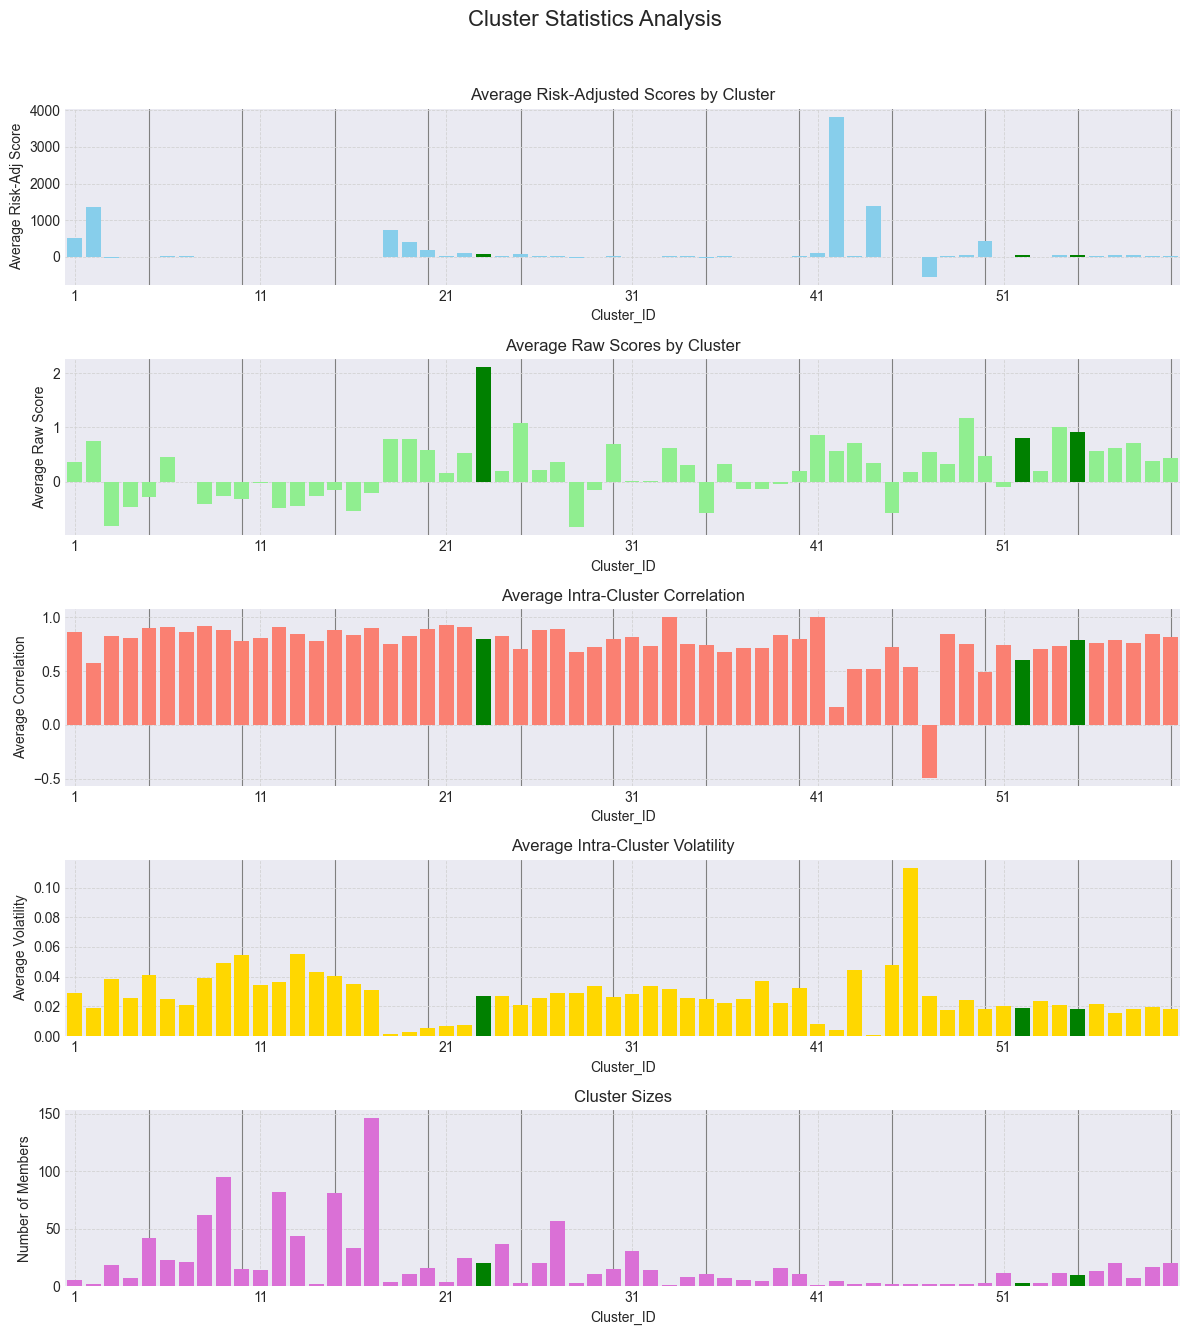

In [34]:
selected_stocks = output['selected_stocks']
# selected_stocks = output['selected_stocks']
selected_cluster_ids = selected_stocks['Cluster_ID'].unique()

plot_cluster_statistics(cluster_stats_df, selected_cluster_ids, highlight_color='green', figsize=(12, 14))

# You can also change the highlight color or figure size:
# plot_cluster_statistics(cluster_stats_df, final_cluster_ids, highlight_color='red', figsize=(10, 14))

In [35]:
print_stock_selection_report(output)


=== CLUSTER SELECTION CRITERIA ===
* Using Composite_Cluster_Score (balancing Raw Score and diversification) for cluster ranking.
* Using Risk_Adj_Score for stock selection within clusters.
* Selected top 50 clusters from 60 total initial clusters.
* Selection Criteria:
    date_str: 2025-04-16
    select_top_n_clusters: 60
    max_selection_per_cluster: 2
    min_cluster_size: 3
    min_raw_score: 2.0
    min_risk_adj_score: 100.0
    penalty_IntraCluster_Corr: 0

=== SELECTED CLUSTERS (RANKED BY COMPOSITE SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         23    20         2.1147             86.6700                 0.7996          0.0270                   2.1147                2                         0.2004
         25     3         1.0739             67.8654                 0.7072          0.0208                   1.0739                0            

In [36]:
import pandas as pd
import numpy as np # Useful for generating the range with floats

# --- Iteration Setup ---
# Generate the factors using numpy.arange for float steps
# Add a small epsilon to the end value to ensure 1.0 is included due to float precision
raw_score_factors = np.arange(0.5, 1.2 + 0.01, 0.1)
risk_adj_score_factors = np.arange(0.5, 1.2 + 0.01, 0.1)

# Store results
all_portfolios = {} # Dictionary to store portfolios by name

# --- Fixed Parameters ---
select_top_n_clusters = 60
max_selection_per_cluster = 2
min_cluster_size = 3  # prevent extreme high risk adj scores
penalty_IntraCluster_Corr = 0
# You might want to get the date dynamically
portf_date_base = date_str # Example date, adjust as needed

# --- Iteration Loop ---
print("Starting portfolio generation loop...")
for raw_scale in raw_score_factors:
    for risk_adj_scale in risk_adj_score_factors:

        # --- Calculate dynamic parameters based on current factors ---
        # Round factors slightly to avoid potential floating point representation issues in calculations/names
        raw_scale = round(raw_scale, 1)
        risk_adj_scale = round(risk_adj_scale, 1)

        min_raw_score = 2.0 * raw_scale
        min_risk_adj_score = 100.0 * risk_adj_scale

        print(f"\nRunning with: raw_score_scale_factor={raw_scale:.1f}, risk_adj_score_scale_factor={risk_adj_scale:.1f}")
        print(f"Resulting thresholds: min_raw_score={min_raw_score:.2f}, min_risk_adj_score={min_risk_adj_score:.1f}")

        # --- Run the selection pipeline ---
        try:
            output = select_stocks_from_clusters(
                cluster_stats_df=cluster_stats_df,
                detailed_clusters_df=detailed_clusters_df,
                select_top_n_clusters=select_top_n_clusters,
                max_selection_per_cluster=max_selection_per_cluster,
                min_cluster_size=min_cluster_size,
                penalty_IntraCluster_Corr=penalty_IntraCluster_Corr,
                min_raw_score=min_raw_score,
                min_risk_adj_score=min_risk_adj_score,
                date_str=portf_date_base # Pass the date
            )

            # --- Process and Store Results ---
            portf_date = output['parameters']['date_str']
            portf_raw_score_val = output['parameters']['min_raw_score'] # Use the value returned by the function
            portf_risk_adj_score_val = output['parameters']['min_risk_adj_score'] # Use the value returned by the function
            _selected_stocks = output['selected_stocks']

            if _selected_stocks is not None and not _selected_stocks.empty:
                portf_selected_stocks = _selected_stocks.set_index('Ticker')[['Weight']] # Select only Weight column after setting index

                # Format the name using the factors or the resulting thresholds
                # Using factors for potentially cleaner names:
                # portf_name = f'{portf_date}_portf_rawFactor_{raw_scale:.1f}_riskAdjFactor_{risk_adj_scale:.1f}'
                # Using resulting thresholds (closer to original example, formatting):
                portf_name = f'{portf_date}_portf_rawscore_{portf_raw_score_val:.2f}_riskadjscore_{portf_risk_adj_score_val:.1f}'

                print(f'Generated Portfolio:')
                # print(f'portf_date: {portf_date}') # redundant if in name
                # print(f'portf_raw_score: {portf_raw_score_val:.2f}') # redundant if in name
                # print(f'portf_risk_adj_score: {portf_risk_adj_score_val:.1f}') # redundant if in name
                print(f'portf_name: {portf_name}')
                print(f'Number of stocks: {len(portf_selected_stocks)}')
                # print(f'port_selected_stocks:\n{portf_selected_stocks}') # Can be verbose, print if needed

                # Store the results - using the portfolio name as the key
                all_portfolios[portf_name] = {
                    'parameters': {
                        'raw_score_scale_factor': raw_scale,
                        'risk_adj_score_scale_factor': risk_adj_scale,
                        'min_raw_score': portf_raw_score_val,
                        'min_risk_adj_score': portf_risk_adj_score_val,
                        'select_top_n_clusters': select_top_n_clusters,
                        'max_selection_per_cluster': max_selection_per_cluster,
                        'min_cluster_size': min_cluster_size,
                        'penalty_IntraCluster_Corr': penalty_IntraCluster_Corr,
                        'date': portf_date
                    },
                    'selected_stocks': portf_selected_stocks
                }
            else:
                 print(f"No stocks selected for raw_scale={raw_scale:.1f}, risk_adj_scale={risk_adj_scale:.1f}")

        except Exception as e:
            print(f"ERROR processing combination raw_scale={raw_scale:.1f}, risk_adj_scale={risk_adj_scale:.1f}: {e}")
            # Decide if you want to continue or stop on error

print(f"\n--- Portfolio Generation Complete ---")
print(f"Generated {len(all_portfolios)} portfolios.")



Starting portfolio generation loop...

Running with: raw_score_scale_factor=0.5, risk_adj_score_scale_factor=0.5
Resulting thresholds: min_raw_score=1.00, min_risk_adj_score=50.0
Generated Portfolio:
portf_name: 2025-04-16_portf_rawscore_1.00_riskadjscore_50.0
Number of stocks: 29

Running with: raw_score_scale_factor=0.5, risk_adj_score_scale_factor=0.6
Resulting thresholds: min_raw_score=1.00, min_risk_adj_score=60.0
Generated Portfolio:
portf_name: 2025-04-16_portf_rawscore_1.00_riskadjscore_60.0
Number of stocks: 24

Running with: raw_score_scale_factor=0.5, risk_adj_score_scale_factor=0.7
Resulting thresholds: min_raw_score=1.00, min_risk_adj_score=70.0
Generated Portfolio:
portf_name: 2025-04-16_portf_rawscore_1.00_riskadjscore_70.0
Number of stocks: 19

Running with: raw_score_scale_factor=0.5, risk_adj_score_scale_factor=0.8
Resulting thresholds: min_raw_score=1.00, min_risk_adj_score=80.0
Generated Portfolio:
portf_name: 2025-04-16_portf_rawscore_1.00_riskadjscore_80.0
Number 

In [37]:
all_portfolios

{'2025-04-16_portf_rawscore_1.00_riskadjscore_50.0': {'parameters': {'raw_score_scale_factor': np.float64(0.5),
   'risk_adj_score_scale_factor': np.float64(0.5),
   'min_raw_score': np.float64(1.0),
   'min_risk_adj_score': np.float64(50.0),
   'select_top_n_clusters': 60,
   'max_selection_per_cluster': 2,
   'min_cluster_size': 3,
   'penalty_IntraCluster_Corr': 0,
   'date': '2025-04-16'},
  'selected_stocks':         Weight
  Ticker        
  UGI     0.0169
  WPC     0.0147
  VICI    0.0137
  BINC    0.0613
  SRAD    0.0177
  IAGG    0.1812
  SPSB    0.2032
  SGOL    0.0392
  GLDM    0.0390
  IBN     0.0269
  HDB     0.0222
  IGF     0.0156
  AMX     0.0153
  ENB     0.0171
  TRP     0.0145
  NTR     0.0151
  PPC     0.0264
  NGG     0.0234
  TEF     0.0179
  HRB     0.0420
  ADC     0.0217
  BUD     0.0206
  CM      0.0138
  COR     0.0215
  EXC     0.0178
  PM      0.0206
  WCN     0.0149
  ATO     0.0257
  CNP     0.0202},
 '2025-04-16_portf_rawscore_1.00_riskadjscore_60.0': {'

In [38]:
output

{'selected_stocks':    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility   Price  MktCap AUM, M  Cluster_Composite_Cluster_Score  Cluster_Avg_IntraCluster_Corr  Cluster_Avg_Volatility  Cluster_Avg_Raw_Score  Cluster_Avg_Risk_Adj_Score  Cluster_Size  Weight
 2          55    HRB     2.9942        167.8649      0.0178 62.9700      8430.0000                           0.9184                         0.7911                  0.0183                 0.9184                     54.2035       10.0000  1.0000,
 'cluster_performance':     Cluster_ID  Size  Avg_IntraCluster_Corr  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
 22          23    20                 0.7996         2.1147             86.6700          0.0270                   2.1147                0                         0.2004
 24          25     3                 0.7072         1.0739             67.8654          0.0208                   1.0739         

In [39]:
print_stock_selection_report(output)


=== CLUSTER SELECTION CRITERIA ===
* Using Composite_Cluster_Score (balancing Raw Score and diversification) for cluster ranking.
* Using Risk_Adj_Score for stock selection within clusters.
* Selected top 50 clusters from 60 total initial clusters.
* Selection Criteria:
    date_str: 2025-04-16
    select_top_n_clusters: 60
    max_selection_per_cluster: 2
    min_cluster_size: 3
    min_raw_score: 2.4
    min_risk_adj_score: 120.0
    penalty_IntraCluster_Corr: 0

=== SELECTED CLUSTERS (RANKED BY COMPOSITE SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         23    20         2.1147             86.6700                 0.7996          0.0270                   2.1147                0                         0.2004
         25     3         1.0739             67.8654                 0.7072          0.0208                   1.0739                0            

In [40]:
# --- Example: Accessing a specific portfolio ---
# # (Choose a valid name generated above)
# example_name = '2023-10-27_portf_rawscore_1.40_riskadjscore_80.0'
# if example_name in all_portfolios:
#     print(f"\nAccessing example portfolio: {example_name}")
#     print(all_portfolios[example_name]['selected_stocks'].head())
# else:
#     print(f"\nExample portfolio name '{example_name}' not found in results.")

# You can now iterate through `all_portfolios` dictionary
for portf_name, portf_data in all_portfolios.items():
    num_stocks = len(portf_data['selected_stocks'])
    print(f"\nPortfolio: {portf_name}")
    print("Parameters:", portf_data['parameters'])
    print(f"Selected Stocks count: {num_stocks}:")
    print(f"{portf_data['selected_stocks'].head(num_stocks)}")


Portfolio: 2025-04-16_portf_rawscore_1.00_riskadjscore_50.0
Parameters: {'raw_score_scale_factor': np.float64(0.5), 'risk_adj_score_scale_factor': np.float64(0.5), 'min_raw_score': np.float64(1.0), 'min_risk_adj_score': np.float64(50.0), 'select_top_n_clusters': 60, 'max_selection_per_cluster': 2, 'min_cluster_size': 3, 'penalty_IntraCluster_Corr': 0, 'date': '2025-04-16'}
Selected Stocks count: 29:
        Weight
Ticker        
UGI     0.0169
WPC     0.0147
VICI    0.0137
BINC    0.0613
SRAD    0.0177
IAGG    0.1812
SPSB    0.2032
SGOL    0.0392
GLDM    0.0390
IBN     0.0269
HDB     0.0222
IGF     0.0156
AMX     0.0153
ENB     0.0171
TRP     0.0145
NTR     0.0151
PPC     0.0264
NGG     0.0234
TEF     0.0179
HRB     0.0420
ADC     0.0217
BUD     0.0206
CM      0.0138
COR     0.0215
EXC     0.0178
PM      0.0206
WCN     0.0149
ATO     0.0257
CNP     0.0202

Portfolio: 2025-04-16_portf_rawscore_1.00_riskadjscore_60.0
Parameters: {'raw_score_scale_factor': np.float64(0.5), 'risk_adj_scor

In [41]:
# df_data = pd.read_parquet(f'..\data\{date_str}_df_finviz_merged.parquet', engine='pyarrow')
df_data = pd.read_parquet(r'..\data\2025-04-15_df_OHLCV_clean.parquet', engine='pyarrow')
df_data

Open     High      Low    Close  Adj Close   Volume  Adj Open  Adj High  Adj Low
Symbol Date                                                                                           
HUBB   2025-04-15 350.1000 353.4800 345.7000 346.5900   346.5900   590110  350.1000  353.4800 345.7000
       2025-04-14 357.4300 360.1100 349.2900 350.5100   350.5100  1009120  357.4300  360.1100 349.2900
       2025-04-11 340.0100 355.9900 335.5500 353.4300   353.4300  1052244  340.0100  355.9900 335.5500
       2025-04-10 341.9100 351.3600 333.4500 341.8400   341.8400   869092  341.9100  351.3600 333.4500
       2025-04-09 316.3700 355.2200 314.7800 351.9500   351.9500  1340732  316.3700  355.2200 314.7800
...                    ...      ...      ...      ...        ...      ...       ...       ...      ...
VLO    2024-04-22 163.8900 167.3000 162.3600 165.9000   161.1200  2130000  159.1679  162.4797 157.6820
       2024-04-19 163.0000 165.5500 162.2200 163.8900   159.1700  2437500  158.3056  160.7822 157.5481
       2024-04-18 167.8400 168.0000 160.9900 162.4900   157.8100  3115000  163.0059  163.1613 156.3532
       2024-04-17 169.2700 170.2900 166.5400 167.2800   162.4600  2469700  164.3927  165.3833 161.7413
       2024-04-16 170.6000 171.2300 166.5700 168.9900   164.1200  2126300  165.6836  166.2954 161.7697

[386540 rows x 9 columns]

In [42]:
import pandas as pd
import numpy as np
from datetime import timedelta
import traceback # Import traceback for detailed error printing

# --- Assume these are available ---
# all_portfolios: The dictionary generated previously.
#                 *** IMPORTANT: Check if the index name in selected_stocks_df is 'Ticker' or 'Symbol'. ***
#                 *** It MUST match the level name used in df_data ('Symbol' in this case). ***
# df_data: Your DataFrame with stock price data.
#          EXPECTED TO HAVE a MultiIndex named ['Symbol', 'Date'].

# Example placeholders (replace with your actual data loading)
# Dummy data for demonstration if you don't have it loaded
# try:
#     # Assume df_data might be loaded here, e.g.:
#     # df_data = pd.read_pickle('your_stock_data.pkl')

#     # Create dummy df_data if it doesn't exist for testing (using 'Symbol')
#     if 'df_data' not in locals():
#         print("Creating dummy df_data for demonstration (using 'Symbol')...")
#         dates = pd.date_range('2025-04-01', '2025-04-15', freq='B') # Business days
#         symbols = ['AAPL', 'MSFT', 'GOOG', 'SPY']
#         # Use 'Symbol' and 'Date' as index names
#         index = pd.MultiIndex.from_product([symbols, dates], names=['Symbol', 'Date'])
#         data = np.random.rand(len(index), 6) * 100 + 50
#         df_data = pd.DataFrame(data, index=index, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
#         # Add other adjusted columns if needed
#         df_data[['Adj Open', 'Adj High', 'Adj Low']] = df_data[['Open', 'High', 'Low']] # Simplistic adjustment
#         # Add some NaNs to test handling
#         df_data.iloc[5:7, df_data.columns.get_loc('Adj Close')] = np.nan # Make MSFT data missing for 2 days
#         df_data.loc[('GOOG', dates[3]), 'Adj Close'] = np.nan # Make GOOG missing on one day
#         print("Dummy df_data created with MultiIndex ['Symbol', 'Date'].")
#         print(df_data.head())

#     # Create dummy all_portfolios if it doesn't exist (using 'Symbol' in selected_stocks)
#     if 'all_portfolios' not in locals():
#          print("\nCreating dummy all_portfolios for demonstration (using 'Symbol')...")
#          all_portfolios = {}
#          for i, raw_f in enumerate([1.4, 1.6, 1.8, 2.0]):
#              for j, risk_f in enumerate([70.0, 80.0, 90.0, 100.0]):
#                  portf_date = '2025-04-08'
#                  portf_name = f"{portf_date}_portf_rawscore_{raw_f:.2f}_riskadjscore_{risk_f:.1f}"
#                  # Select different stocks for variety, including one that might have issues
#                  if (i + j) % 3 == 0:
#                      stocks = ['AAPL', 'MSFT'] # MSFT has NaNs
#                      weights = [0.6, 0.4]
#                  elif (i + j) % 3 == 1:
#                      stocks = ['GOOG', 'SPY'] # GOOG has a NaN
#                      weights = [0.5, 0.5]
#                  else:
#                      stocks = ['AAPL', 'SPY', 'FAKE'] # FAKE won't be in df_data
#                      weights = [0.4, 0.4, 0.2]

#                  # *** Make sure the index name here is 'Symbol' ***
#                  selected_df = pd.DataFrame({'Weight': weights}, index=pd.Index(stocks, name='Symbol')) # Use 'Symbol'
#                  all_portfolios[portf_name] = {
#                      'parameters': {'date': portf_date, 'raw_score_scale_factor': raw_f, 'risk_adj_score_scale_factor': risk_f},
#                      'selected_stocks': selected_df
#                  }
#          print(f"Dummy all_portfolios created with {len(all_portfolios)} portfolios (index='Symbol').")


# except Exception as e:
#     print(f"Error setting up dummy data: {e}")
#     traceback.print_exc()


# <<< --- FIX: ADAPT TO EXISTING INDEX NAMES --- >>>
print("\nChecking df_data index structure...")

# Define variables for the actual index level names discovered
ticker_level_name = None
date_level_name = None

try:
    if isinstance(df_data.index, pd.MultiIndex) and len(df_data.index.levels) >= 2:
        actual_names = list(df_data.index.names)
        print(f"Detected MultiIndex with names: {actual_names}")

        # Assign discovered names (assuming Ticker/Symbol is first, Date is second)
        # Handle unnamed levels (None) if necessary
        ticker_level_name = actual_names[0] if actual_names[0] is not None else 0 # Use name or position 0
        date_level_name = actual_names[1] if actual_names[1] is not None else 1   # Use name or position 1

        # Verify the discovered names seem reasonable (optional check)
        if isinstance(ticker_level_name, int) or isinstance(date_level_name, int):
             print(f"Warning: Using positional index levels ({ticker_level_name}, {date_level_name}) as names were missing.")
        elif 'Date' not in date_level_name: # Simple check if date level name looks plausible
             print(f"Warning: Second index level name '{date_level_name}' doesn't contain 'Date'. Ensure this is correct.")

        print(f"Using '{ticker_level_name}' for ticker/symbol level and '{date_level_name}' for date level.")

        # Sort index if necessary for performance
        if not df_data.index.is_monotonic_increasing:
             print("Sorting index...")
             df_data = df_data.sort_index()

    else:
        # If it's not a MultiIndex, check if 'Symbol'/'Ticker' and 'Date' are columns
        print("Index is not a MultiIndex. Checking columns...")
        # *** Adjust these column names if your actual columns are different ***
        potential_ticker_col = 'Symbol' # Check for 'Symbol' first
        if potential_ticker_col not in df_data.columns:
            potential_ticker_col = 'Ticker' # Fallback to 'Ticker'
        potential_date_col = 'Date'

        required_cols = []
        if potential_ticker_col in df_data.columns:
             required_cols.append(potential_ticker_col)
        if potential_date_col in df_data.columns:
             required_cols.append(potential_date_col)

        if len(required_cols) == 2:
            print(f"Attempting to set index using columns: {required_cols}...")
            df_data = df_data.set_index(required_cols)
            ticker_level_name = required_cols[0] # Set names based on columns used
            date_level_name = required_cols[1]
            print(f"MultiIndex set. Using '{ticker_level_name}' and '{date_level_name}'.")
             # Sort index after setting
            if not df_data.index.is_monotonic_increasing:
                 print("Sorting index...")
                 df_data = df_data.sort_index()
        else:
            missing = [col for col in [potential_ticker_col, potential_date_col] if col not in df_data.columns and col not in (df_data.index.names if isinstance(df_data.index, pd.MultiIndex) else [])]
            print(f"ERROR: Cannot set index. Required columns not found: {missing}")
            print("df_data columns:", df_data.columns)
            print("df_data index names:", df_data.index.names)
            import sys
            sys.exit("Exiting due to incorrect df_data structure.")


except Exception as e:
    print(f"ERROR: An unexpected error occurred during index check/setup: {e}")
    traceback.print_exc()
    import sys
    sys.exit("Exiting due to index setup error.")

# --- Recalculate trading_dates based on the potentially fixed df_data index ---
try:
    # Use the discovered date_level_name
    all_dates_in_data = df_data.index.get_level_values(date_level_name).unique()
    trading_dates = pd.DatetimeIndex(all_dates_in_data).sort_values()
    if not trading_dates.empty:
         print(f"\nTrading dates extracted using level '{date_level_name}'. Found {len(trading_dates)} unique dates.")
    else:
         print("WARNING: No dates found in the index. Trading date logic will fail.")

except (KeyError, IndexError) as e:
    print(f"ERROR: Could not find or access level '{date_level_name}' to extract trading dates: {e}")
    trading_dates = pd.DatetimeIndex([]) # Ensure it exists but is empty
    import sys
    sys.exit("Exiting - Cannot determine trading dates.")
except Exception as e:
    print(f"ERROR: An unexpected error occurred extracting trading dates: {e}")
    trading_dates = pd.DatetimeIndex([]) # Ensure it exists but is empty
    import sys
    sys.exit("Exiting - Cannot determine trading dates.")


# --- Helper Function to find next trading date (same as before) ---
def get_next_trading_date(current_date, trading_dates):
    """Finds the first trading date strictly after current_date."""
    if trading_dates.empty: # Handle empty trading dates
        return None
    current_date = pd.Timestamp(current_date)
    try:
        # Ensure trading_dates is sorted (should be already, but double-check)
        if not trading_dates.is_monotonic_increasing:
             trading_dates = trading_dates.sort_values()
        loc = trading_dates.searchsorted(current_date, side='right')
        if loc < len(trading_dates):
            return trading_dates[loc]
        else:
            return None # No trading date found after current_date
    except Exception as e:
        print(f"Error in get_next_trading_date for {current_date}: {e}")
        return None

# --- Calculate Returns for Each Portfolio ---
portfolio_returns_data = []

print("\nCalculating portfolio returns (handling missing tickers)...")
for portf_name, portf_data in all_portfolios.items():
    try:
        # Extract portfolio generation date and parameters
        params = portf_data['parameters']
        portf_date_str = params['date']
        portf_date = pd.Timestamp(portf_date_str)
        raw_factor = params['raw_score_scale_factor']
        risk_adj_factor = params['risk_adj_score_scale_factor']
        selected_stocks_df = portf_data['selected_stocks'] # Index=Symbol, Cols=[Weight]

        # *** Check if selected_stocks_df index name matches ticker_level_name ***
        if not isinstance(selected_stocks_df.index, pd.Index) or selected_stocks_df.index.name != ticker_level_name:
             print(f"Warning for {portf_name}: Index name of selected_stocks ('{selected_stocks_df.index.name}') does not match df_data ticker level ('{ticker_level_name}'). Attempting to rename.")
             try:
                 selected_stocks_df.index.name = ticker_level_name
                 print(f"Renamed selected_stocks index to '{ticker_level_name}'.")
             except Exception as rename_e:
                 print(f"Failed to rename selected_stocks index: {rename_e}. Skipping portfolio.")
                 continue # Skip if renaming fails

        if selected_stocks_df.empty:
            continue

        original_portfolio_tickers = selected_stocks_df.index.tolist()

        # Find Buy Date
        buy_date = get_next_trading_date(portf_date, trading_dates)
        if buy_date is None:
            print(f"Skipping {portf_name}: No trading date found after generation date {portf_date.date()}")
            continue

        # Find Sell Date
        sell_date = get_next_trading_date(buy_date, trading_dates)
        if sell_date is None:
            print(f"Skipping {portf_name}: No trading date found after buy date {buy_date.date()}")
            continue

        required_dates = [buy_date, sell_date]

        # --- MODIFIED PRICE FETCHING AND TICKER VALIDATION ---
        # 1. Filter df_data using the discovered level names
        potential_data = df_data.loc[
            (df_data.index.get_level_values(ticker_level_name).isin(original_portfolio_tickers)) &
            (df_data.index.get_level_values(date_level_name).isin(required_dates))
        ]

        # 2. Check which tickers *actually* have data for BOTH required dates
        ticker_date_counts = potential_data.index.get_level_values(ticker_level_name).value_counts()
        available_tickers = ticker_date_counts[ticker_date_counts >= len(required_dates)].index.tolist() # Use >= for robustness? Or == 2

        # 3. Check if any tickers remain
        if not available_tickers:
             print(f"Skipping {portf_name}: No stocks from portfolio found with data for BOTH Buy({buy_date.date()}) and Sell({sell_date.date()}) dates in df_data index.")
             continue

        # Report dropped tickers
        dropped_tickers = set(original_portfolio_tickers) - set(available_tickers)
        if dropped_tickers:
             expected_but_dropped = [t for t in dropped_tickers if t in df_data.index.get_level_values(ticker_level_name).unique()]
             # unexpected_tickers = [t for t in dropped_tickers if t not in df_data.index.get_level_values(ticker_level_name).unique()] # Tickers in portfolio but never in data
             if expected_but_dropped:
                  print(f"Warning for {portf_name}: Dropping tickers with missing data on {buy_date.date()}/{sell_date.date()}: {', '.join(expected_but_dropped)}")

        # 4. Fetch 'Adj Close' *only* for available tickers and required dates
        try:
            # Use .loc with precise index slicing (using discovered names)
            idx_slice = pd.IndexSlice[available_tickers, required_dates]
            # Ensure 'Adj Close' is the correct column name
            adj_close_col = 'Adj Close'
            if adj_close_col not in potential_data.columns:
                print(f"ERROR for {portf_name}: Column '{adj_close_col}' not found in potential_data. Available: {potential_data.columns}")
                continue
            prices = potential_data.loc[idx_slice, adj_close_col]

            # Unstack using the discovered date level name
            prices_unstacked = prices.unstack(level=date_level_name)

            # Rename columns for clarity and robustness
            prices_unstacked = prices_unstacked.rename(columns={buy_date: 'Buy Price', sell_date: 'Sell Price'})

            # 5. Drop any rows (tickers) that *still* have NaN after unstacking
            prices_unstacked = prices_unstacked.dropna()

            if prices_unstacked.empty:
                print(f"Skipping {portf_name}: All remaining stocks had NaN prices on required dates after unstacking.")
                continue

            final_available_tickers = prices_unstacked.index.tolist()

        except KeyError as e:
             print(f"KeyError during final price processing for {portf_name}: {e}. Check slicing logic or column name '{adj_close_col}'.")
             traceback.print_exc()
             continue
        except Exception as e:
             print(f"Error during final price processing for {portf_name} (Buy: {buy_date.date()}, Sell: {sell_date.date()}): {e}")
             traceback.print_exc()
             continue

        # --- Calculate Returns using only available tickers ---

        # 6. Select weights ONLY for the final available tickers
        # selected_stocks_df index should now match ticker_level_name due to check/rename above
        aligned_weights = selected_stocks_df.loc[final_available_tickers, 'Weight']

        # 7. Normalize weights for the stocks actually used
        weight_sum = aligned_weights.sum()
        if weight_sum <= 1e-9: # Use tolerance
             print(f"Skipping {portf_name}: Sum of weights for available stocks is too close to zero ({weight_sum:.4f}).")
             continue
        normalized_weights = aligned_weights / weight_sum

        # Get prices for calculation
        buy_prices = prices_unstacked.loc[final_available_tickers, 'Buy Price']
        sell_prices = prices_unstacked.loc[final_available_tickers, 'Sell Price']

        # Check for zero prices
        if (buy_prices.abs() < 1e-9).any():
            zero_price_mask = (buy_prices.abs() >= 1e-9)
            num_zero = (~zero_price_mask).sum()
            print(f"Warning: Found {num_zero} stock(s) with near-zero buy price in {portf_name} on {buy_date.date()}. Excluding them.")

            if not zero_price_mask.all():
                buy_prices = buy_prices[zero_price_mask]
                sell_prices = sell_prices[zero_price_mask]
                normalized_weights = normalized_weights.loc[zero_price_mask]

                if buy_prices.empty:
                     print(f"Skipping {portf_name}: No stocks remaining after zero price check.")
                     continue

                weight_sum = normalized_weights.sum()
                if weight_sum <= 1e-9:
                    print(f"Skipping {portf_name}: Sum of weights became near-zero after removing zero-price stocks.")
                    continue
                normalized_weights = normalized_weights / weight_sum

        # Calculate individual stock returns
        individual_returns = (sell_prices / buy_prices) - 1

        # Calculate weighted portfolio return
        portfolio_return = (individual_returns * normalized_weights).sum()

        # Store the result
        portfolio_returns_data.append({
            'portfolio_name': portf_name,
            'generation_date': portf_date,
            'buy_date': buy_date,
            'sell_date': sell_date,
            'raw_factor': raw_factor,
            'risk_adj_factor': risk_adj_factor,
            'portfolio_return': portfolio_return,
            'num_stocks_initial': len(original_portfolio_tickers),
            'num_stocks_calc': len(final_available_tickers)
        })

    except Exception as e:
        print(f"FATAL Error processing portfolio {portf_name}: {e}")
        traceback.print_exc()

# --- Convert results to DataFrame ---
if portfolio_returns_data:
    returns_df = pd.DataFrame(portfolio_returns_data)
    returns_df = returns_df.sort_values(by=['generation_date', 'raw_factor', 'risk_adj_factor'])

    print("\n--- Portfolio Return Calculation Complete ---")
    print(returns_df.head())
    print(f"\nCalculated returns for {len(returns_df)} portfolio instances.")

    # --- Analyze Results ---
    print("\n--- Performance Analysis by Factor Combination ---")
    performance_summary = returns_df.groupby(['raw_factor', 'risk_adj_factor'])['portfolio_return'].agg(
        mean='mean',
        median='median',
        std=lambda x: x.std(ddof=0) if len(x) > 1 else 0.0, # Handle stddev calc
        count='count'
    )
    performance_summary = performance_summary.sort_values(by='mean', ascending=False)

    # # <<< --- ADD THIS CORRECTION --- >>>
    # # Set std to NaN where count is 1, as std dev isn't meaningful for a single point
    # mask_single_count = performance_summary['count'] == 1
    # if mask_single_count.any():
    #     performance_summary.loc[mask_single_count, 'std'] = np.nan
    # # <<< --- END CORRECTION --- >>>

    print("\nPerformance per Factor Combination (sorted by mean return):")
    with pd.option_context('display.float_format', '{:.4f}'.format):
        print(performance_summary)

    stock_count_summary = returns_df.groupby(['raw_factor', 'risk_adj_factor'])['num_stocks_calc'].agg(['mean', 'min', 'max'])
    print("\nAverage/Min/Max Stocks Used in Calculation per Factor Combination:")
    with pd.option_context('display.float_format', '{:.2f}'.format):
        print(stock_count_summary)

else:
    print("\nNo portfolio returns were calculated.")

# Optional: Save results
if 'returns_df' in locals() and not returns_df.empty:
    returns_df.to_csv('portfolio_daily_returns_handled.csv', index=False)
    print("\nReturns saved to portfolio_daily_returns_handled.csv")
if 'performance_summary' in locals() and not performance_summary.empty:
    performance_summary.to_csv('portfolio_factor_performance_handled.csv')
    print("Performance summary saved to portfolio_factor_performance_handled.csv")


Checking df_data index structure...
Detected MultiIndex with names: ['Symbol', 'Date']
Using 'Symbol' for ticker/symbol level and 'Date' for date level.
Sorting index...

Trading dates extracted using level 'Date'. Found 251 unique dates.

Calculating portfolio returns (handling missing tickers)...
Warning for 2025-04-16_portf_rawscore_1.00_riskadjscore_50.0: Index name of selected_stocks ('Ticker') does not match df_data ticker level ('Symbol'). Attempting to rename.
Renamed selected_stocks index to 'Symbol'.
Skipping 2025-04-16_portf_rawscore_1.00_riskadjscore_50.0: No trading date found after generation date 2025-04-16
Warning for 2025-04-16_portf_rawscore_1.00_riskadjscore_60.0: Index name of selected_stocks ('Ticker') does not match df_data ticker level ('Symbol'). Attempting to rename.
Renamed selected_stocks index to 'Symbol'.
Skipping 2025-04-16_portf_rawscore_1.00_riskadjscore_60.0: No trading date found after generation date 2025-04-16
Warning for 2025-04-16_portf_rawscore_1

In [43]:
# # Default values
# select_top_n_clusters = 3
# max_selection_per_cluster = 5
# min_cluster_size = 5
# penalty_IntraCluster_Corr = 0.3
# min_raw_score = None      
# min_risk_adj_score = None  

raw_score_scale_factor = 0.8
risk_adj_score_scale_factor = 0.8

select_top_n_clusters = 60
max_selection_per_cluster = 2
min_cluster_size = 3  # prevent extreme high risk adj scores 
min_raw_score = 2.0 * raw_score_scale_factor    
min_risk_adj_score = 100.0  * risk_adj_score_scale_factor
penalty_IntraCluster_Corr = 0

# Run the selection pipeline
output = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    select_top_n_clusters=select_top_n_clusters,
    max_selection_per_cluster=max_selection_per_cluster,
    min_cluster_size=min_cluster_size,
    penalty_IntraCluster_Corr=penalty_IntraCluster_Corr,
    min_raw_score=min_raw_score,      # Example threshold
    min_risk_adj_score=min_risk_adj_score  # Example threshold    
)

portf_date = output['parameters']['date_str']
portf_raw_score = output['parameters']['min_raw_score']
portf_risk_adj_score = output['parameters']['min_risk_adj_score']
_selected_stocks = output['selected_stocks']
portf_selected_stocks = _selected_stocks[['Ticker', 'Weight']].set_index('Ticker')
portf_name = f'{portf_date}_portf_rawscore_{portf_raw_score}_riskadjscore_{portf_risk_adj_score}'

# new_df = portf_selected_stocks[['Ticker', 'Weight']].set_index('Ticker')

print(f'portf_date: {portf_date}')
print(f'portf_raw_score: {portf_raw_score}')
print(f'portf_risk_adj_score: {portf_risk_adj_score}')
print(f'port_selected_stocks:\n{portf_selected_stocks}')
print(f'\nportf_name: {portf_name}')



portf_date: 2025-04-16
portf_raw_score: 1.6
portf_risk_adj_score: 80.0
port_selected_stocks:
        Weight
Ticker        
SGOL    0.2058
GLDM    0.2047
PPC     0.1385
NGG     0.1227
HRB     0.2202
PM      0.1081

portf_name: 2025-04-16_portf_rawscore_1.6_riskadjscore_80.0


In [44]:
portf_date = output['parameters']['date_str']
portf_raw_score = output['parameters']['min_raw_score']
portf_risk_adj_score = output['parameters']['min_risk_adj_score']
# portf_selected_stocks = output['selected_stocks']
portf_selected_stocks = output['selected_stocks'][['Ticker', 'Weight']].set_index('Ticker')
portf_name = f'{portf_date}_portf_rawscore_{portf_raw_score}_riskadjscore_{portf_risk_adj_score}'

# new_df = portf_selected_stocks[['Ticker', 'Weight']].set_index('Ticker')

print(f'portf_date: {portf_date}')
print(f'portf_raw_score: {portf_raw_score}')
print(f'portf_risk_adj_score: {portf_risk_adj_score}')
print(f'port_selected_stocks:\n{portf_selected_stocks}')
print(f'\nportf_name: {portf_name}')



portf_date: 2025-04-16
portf_raw_score: 1.6
portf_risk_adj_score: 80.0
port_selected_stocks:
        Weight
Ticker        
SGOL    0.2058
GLDM    0.2047
PPC     0.1385
NGG     0.1227
HRB     0.2202
PM      0.1081

portf_name: 2025-04-16_portf_rawscore_1.6_riskadjscore_80.0
